In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Download Boston Housing dataset directly into Colab
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
# Check for missing values
print(df.isnull().sum())
print("\nDataset Info:")
df.describe()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Dataset Info:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


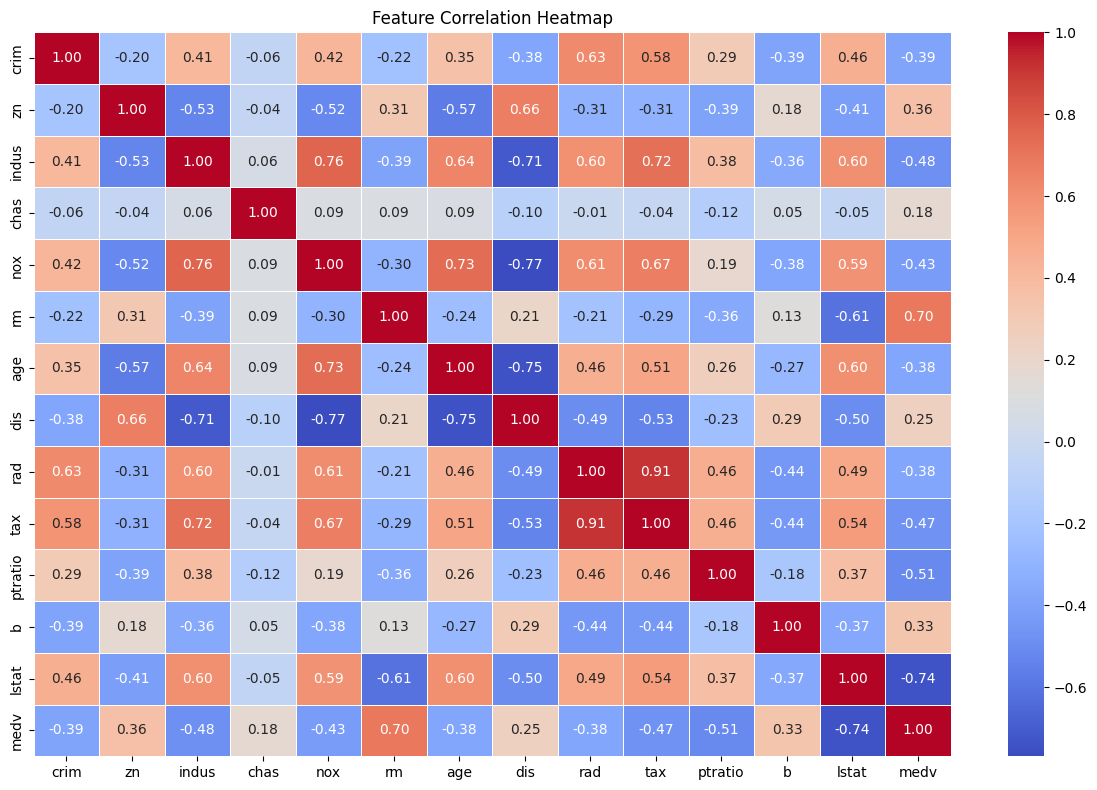

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

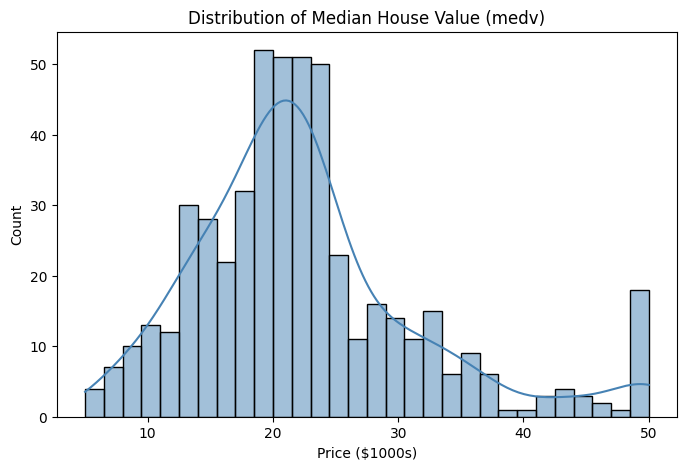

In [18]:
# Distribution of target variable (medv = Median House Value)
plt.figure(figsize=(8, 5))
sns.histplot(df['medv'], kde=True, bins=30, color='steelblue')
plt.title('Distribution of Median House Value (medv)')
plt.xlabel('Price ($1000s)')
plt.ylabel('Count')
plt.show()

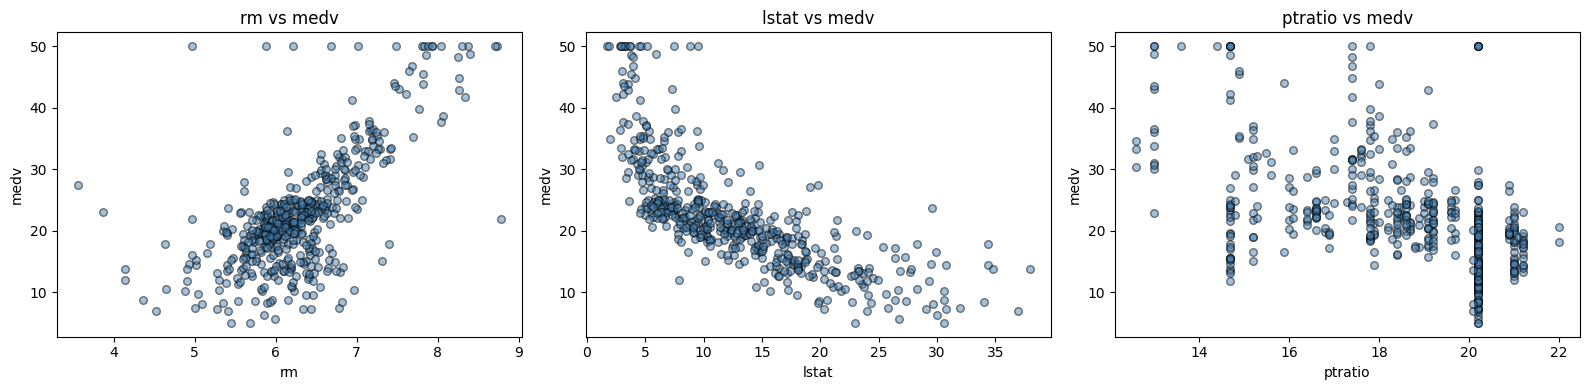

In [ ]:
# Key feature vs target scatter plots
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for ax, col in zip(axes, ['rm', 'lstat', 'ptratio']):
    ax.scatter(df[col], df['medv'], alpha=0.5, color='steelblue', edgecolors='k', s=30)
    ax.set_xlabel(col)
    ax.set_ylabel('medv')
    ax.set_title(f'{col} vs medv')
plt.tight_layout()
plt.show()

In [20]:
# Train-Test Split
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set:     {X_test.shape[0]} samples")

Training set: 404 samples
Test set:     102 samples


In [21]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error:  {mse:.2f}")
print(f"Root MSE:            {rmse:.2f}")
print(f"R² Score:            {r2:.4f}")

Mean Squared Error:  24.29
Root MSE:            4.93
R² Score:            0.6688


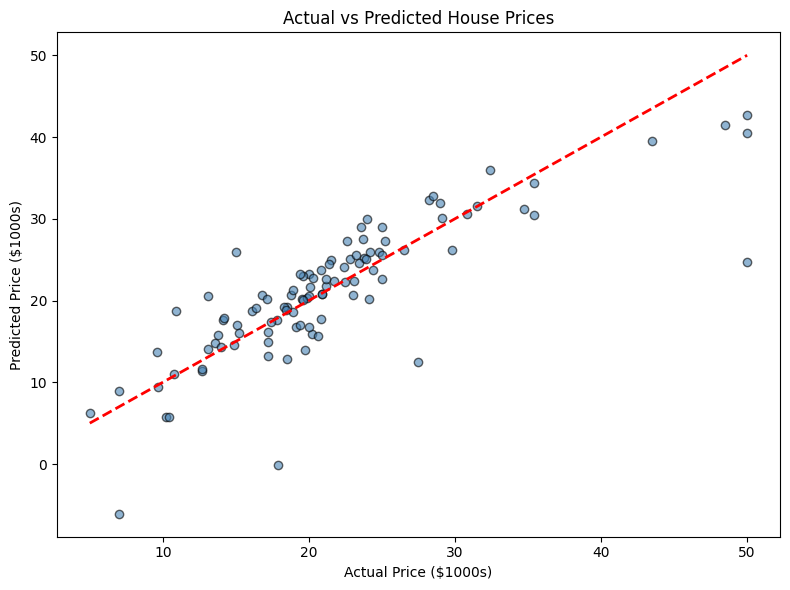

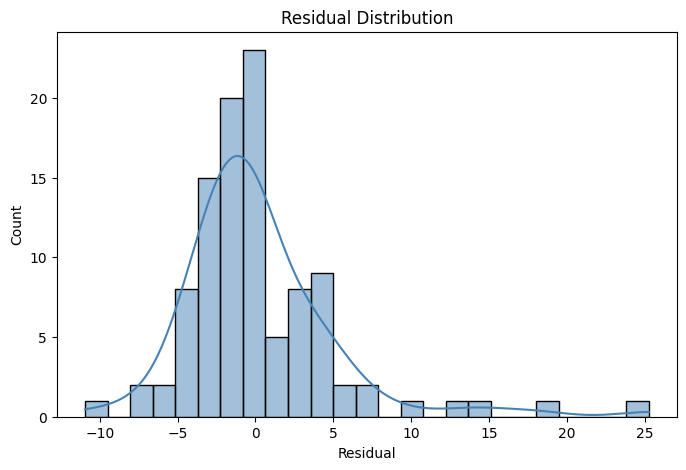

In [22]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='steelblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=25, color='steelblue')
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [23]:
# --- Model Comparison: Find the Best Model ---
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Feature Scaling (important for distance-based & regularized models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied.")

Feature scaling applied.


In [24]:
# Train & evaluate multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=10, gamma='scale'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=200, random_state=42),
}

results = []
for name, mdl in models.items():
    # Use scaled data for models that benefit from it
    if name in ['KNN', 'SVR', 'Ridge Regression', 'Lasso Regression', 'ElasticNet']:
        mdl.fit(X_train_scaled, y_train)
        pred = mdl.predict(X_test_scaled)
        cv = cross_val_score(mdl, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        mdl.fit(X_train, y_train)
        pred = mdl.predict(X_test)
        cv = cross_val_score(mdl, X_train, y_train, cv=5, scoring='r2')
    
    r2 = r2_score(y_test, pred)
    rmse_val = np.sqrt(mean_squared_error(y_test, pred))
    results.append({
        'Model': name,
        'R² (Test)': round(r2, 4),
        'RMSE (Test)': round(rmse_val, 4),
        'CV R² Mean': round(cv.mean(), 4),
        'CV R² Std': round(cv.std(), 4)
    })

results_df = pd.DataFrame(results).sort_values('R² (Test)', ascending=False).reset_index(drop=True)
print("=" * 70)
print("MODEL COMPARISON")
print("=" * 70)
results_df

MODEL COMPARISON


,Model,R² (Test),RMSE (Test),CV R² Mean,CV R² Std
0,Gradient Boosting,0.9166,2.4735,0.8502,0.0587
1,Random Forest,0.8840,2.9172,0.8248,0.0496
2,Decision Tree,0.8580,3.2274,0.6694,0.0671
3,AdaBoost,0.8325,3.5048,0.7935,0.0605
4,SVR,0.8263,3.5691,0.8309,0.0281
5,KNN,0.7190,4.5393,0.7393,0.0552
6,Linear Regression,0.6688,4.9286,0.7244,0.0635
7,Ridge Regression,0.6685,4.9308,0.7245,0.0635
8,ElasticNet,0.6563,5.0203,0.7199,0.0622
9,Lasso Regression,0.6501,5.0652,0.7180,0.0640


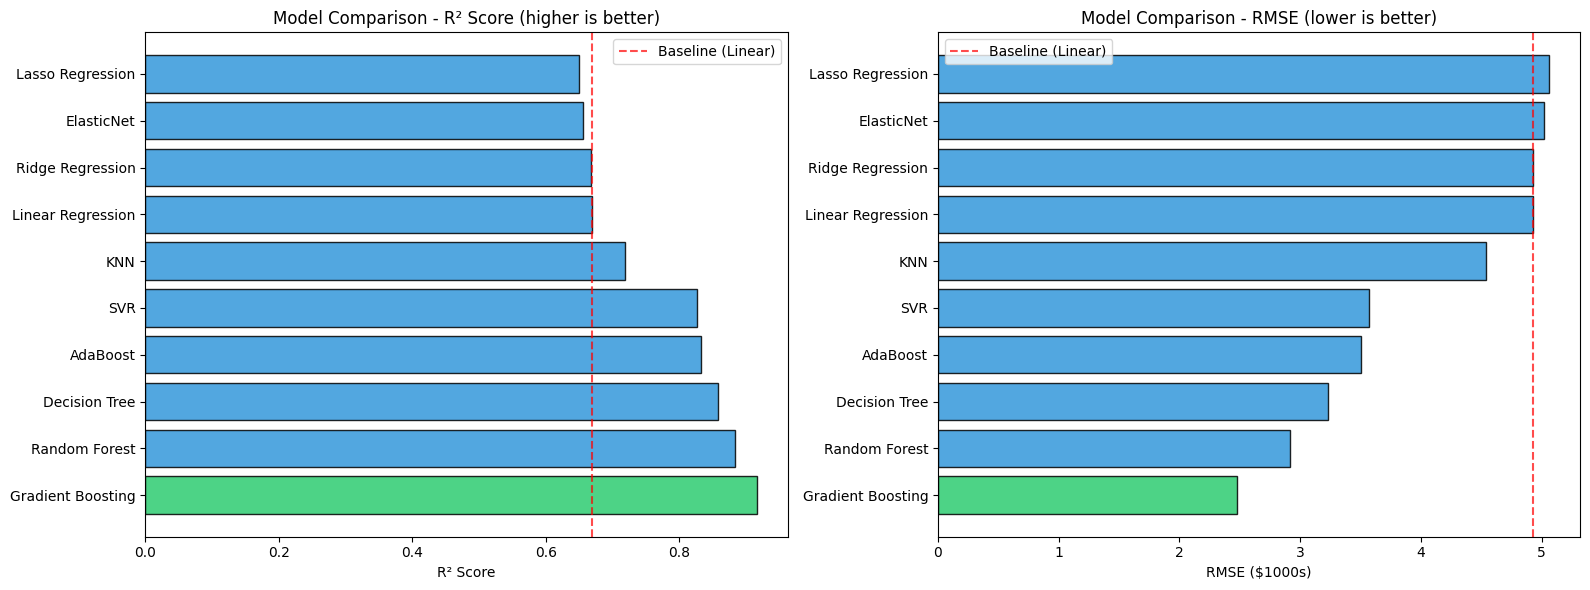


🏆 Best Model: Gradient Boosting
   R² Score: 0.9166
   RMSE:     $2474


In [25]:
# Visual comparison of models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# R² Score comparison
colors = ['#2ecc71' if i == 0 else '#3498db' for i in range(len(results_df))]
axes[0].barh(results_df['Model'], results_df['R² (Test)'], color=colors, edgecolor='k', alpha=0.85)
axes[0].set_xlabel('R² Score')
axes[0].set_title('Model Comparison - R² Score (higher is better)')
axes[0].axvline(x=0.67, color='red', linestyle='--', alpha=0.7, label='Baseline (Linear)')
axes[0].legend()

# RMSE comparison
axes[1].barh(results_df['Model'], results_df['RMSE (Test)'], color=colors, edgecolor='k', alpha=0.85)
axes[1].set_xlabel('RMSE ($1000s)')
axes[1].set_title('Model Comparison - RMSE (lower is better)')
axes[1].axvline(x=4.93, color='red', linestyle='--', alpha=0.7, label='Baseline (Linear)')
axes[1].legend()

plt.tight_layout()
plt.show()

best = results_df.iloc[0]
print(f"\n🏆 Best Model: {best['Model']}")
print(f"   R² Score: {best['R² (Test)']}")
print(f"   RMSE:     ${best['RMSE (Test)'] * 1000:.0f}")

In [26]:
# Hyperparameter tuning for Gradient Boosting (typically the top performer)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.15],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

gb_tuned = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_tuned, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

r2_tuned = r2_score(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("=" * 50)
print("TUNED GRADIENT BOOSTING RESULTS")
print("=" * 50)
print(f"Best Params:  {grid_search.best_params_}")
print(f"R² Score:     {r2_tuned:.4f}")
print(f"RMSE:         {rmse_tuned:.4f}")
print(f"\nImprovement over Linear Regression:")
print(f"  R²:   {0.6688:.4f} → {r2_tuned:.4f}  (+{(r2_tuned - 0.6688)*100:.2f}%)")
print(f"  RMSE: {4.93:.4f} → {rmse_tuned:.4f}")

TUNED GRADIENT BOOSTING RESULTS
Best Params:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.8}
R² Score:     0.9134
RMSE:         2.5194

Improvement over Linear Regression:
  R²:   0.6688 → 0.9134  (+24.46%)
  RMSE: 4.9300 → 2.5194


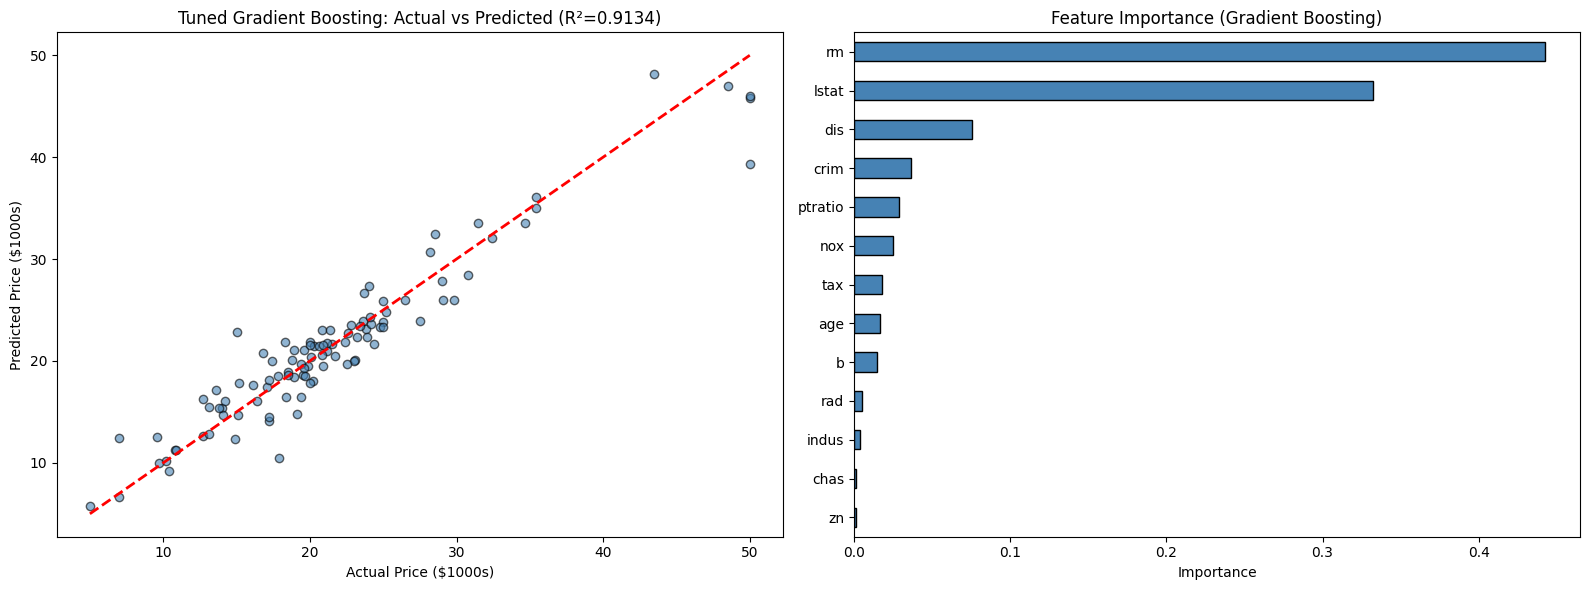

In [27]:
# Final: Actual vs Predicted for the tuned model + Feature Importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred_tuned, alpha=0.6, color='steelblue', edgecolors='k')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($1000s)')
axes[0].set_ylabel('Predicted Price ($1000s)')
axes[0].set_title(f'Tuned Gradient Boosting: Actual vs Predicted (R²={r2_tuned:.4f})')

# Feature Importance
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values()
feat_imp.plot(kind='barh', ax=axes[1], color='steelblue', edgecolor='k')
axes[1].set_title('Feature Importance (Gradient Boosting)')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()